In [5]:
from data_util.get_train_test_data import get_train_test_data
import numpy as np
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X_train, X_test, y_train, y_test, df, X, y = get_train_test_data("/Users/karan.verma/com5101m/final_assesment/anneal.data")

In [8]:
df

,family,product_type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non_ageing,...,s,p,shape,thick,width,len,oil,bore,packing,target
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,NaN,C,A,0,50,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,1.001,50.0,0,Y,0,NaN,3
794,NaN,C,A,0,0,NaN,S,1,0,NaN,...,NaN,NaN,SHEET,0.699,1300.0,4880,NaN,0,NaN,3
795,NaN,C,A,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,0.400,609.9,0,NaN,0,NaN,3
796,NaN,C,A,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,3.200,610.0,4880,NaN,0,NaN,3


In [11]:
df[["carbon", "hardness", "strength", "thick", "width", "len"]].isnull().any()

carbon      False
hardness    False
strength    False
thick       False
width       False
len         False
dtype: bool

In [5]:
categorical_features = ["steel", "shape", "bore"]
numerical_features = list((set(df.columns.to_list()) - set(categorical_features)) - {'target'})

In [6]:
numerical_features

['carbon', 'len', 'width', 'hardness', 'thick', 'strength']

In [7]:
numerical_df = df[numerical_features]

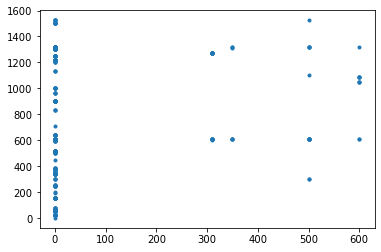

In [43]:
plt.plot(numerical_df.strength, numerical_df.width,'.')

<AxesSubplot:>

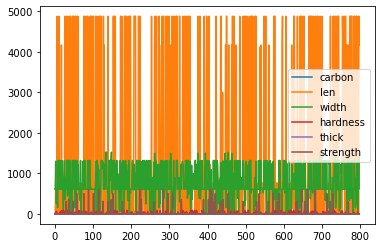

In [38]:
numerical_df.plot()

In [14]:
numerical_df.describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999], )

,carbon,len,width,hardness,thick,strength
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,3.579747,1285.929114,784.743165,11.867089,1.185587,27.493671
std,13.657242,1891.927765,404.222134,24.716928,0.865034,109.695034
min,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
10%,0.000000,0.000000,255.090000,0.000000,0.400000,0.000000
20%,0.000000,0.000000,609.900000,0.000000,0.600000,0.000000
30%,0.000000,0.000000,610.000000,0.000000,0.699000,0.000000
40%,0.000000,0.000000,610.000000,0.000000,0.700000,0.000000
50%,0.000000,612.000000,610.000000,0.000000,0.800000,0.000000
60%,0.000000,762.000000,610.000000,0.000000,1.000000,0.000000


In [34]:
df.target.value_counts()

3    608
2     88
5     60
U     34
Name: target, dtype: int64

In [15]:
numerical_df.strength.value_counts()

0      740
310     17
500     16
600     10
350      7
Name: strength, dtype: int64

In [35]:
df[df.strength == 0].target.value_counts()

3    575
2     71
5     60
U     34
Name: target, dtype: int64

In [32]:
df[df.strength == 310].target.value_counts()

3    17
Name: target, dtype: int64

In [33]:
df[df.strength == 500].target.value_counts()

3    9
2    7
Name: target, dtype: int64

In [36]:
df[df.strength == 600].target.value_counts()

2    10
Name: target, dtype: int64

In [37]:
df[df.strength == 350].target.value_counts()

3    7
Name: target, dtype: int64